In [13]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Utils and load data

In [14]:
def plot_predictions(model, X_test, Y_test):
  T = X_test.shape[1]
  D = X_test.shape[2]

  validation_target = Y_test
  validation_predictions_one_step = []
  validation_predictions_future_forecast = []
  
  # future predictions
  x = X_test[0]
  for t in X_test:
    pred = model.predict(x.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_future_forecast.append(prediction)
    x[:-1,:] = x[1:,:]
    x[-1,:] = prediction

  # one step prediction
  for t in X_test:
    pred = model.predict(t.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_one_step.append(prediction)
    

  # plot
  plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_one_step, label='forecast prediction')
  plt.title('One Step Prediction')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_future_forecast, label='forecast prediction')
  plt.title('Long term prediction')
  plt.legend();

  plt.show()

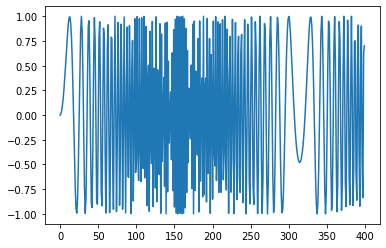

X shape: (390, 10, 1) , Y shape: (390,)


In [15]:
N = 400
T = 10
D = 1
M = 5
idx = -N//2

series = np.sin((0.1*np.arange(N))**2)
plt.plot(series)
plt.show()

X = []
Y = []
for t in range(N-T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)

print('X shape:', X.shape, ', Y shape:', Y.shape)

# Simple Auto Regressive model

Epoch 1/80
6/6 [==============================] - 1s 32ms/step - loss: 1.0555 - val_loss: 0.9007
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.9934 - val_loss: 0.8488
Epoch 3/80
6/6 [==============================] - 0s 12ms/step - loss: 0.9394 - val_loss: 0.8012
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.8878 - val_loss: 0.7572
Epoch 5/80
6/6 [==============================] - 0s 12ms/step - loss: 0.8390 - val_loss: 0.7176
Epoch 6/80
6/6 [==============================] - 0s 12ms/step - loss: 0.7933 - val_loss: 0.6821
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.7571 - val_loss: 0.6506
Epoch 8/80
6/6 [==============================] - 0s 11ms/step - loss: 0.7201 - val_loss: 0.6228
Epoch 9/80
6/6 [==============================] - 0s 12ms/step - loss: 0.6935 - val_loss: 0.5984
Epoch 10/80
6/6 [==============================] - 0s 11ms/step - loss: 0.6652 - val_loss: 0.5773
Epoch 11/80
6/6 [=============

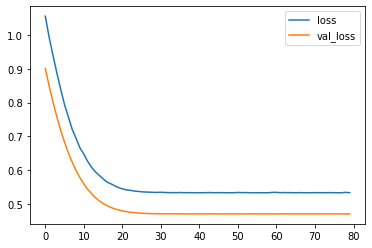

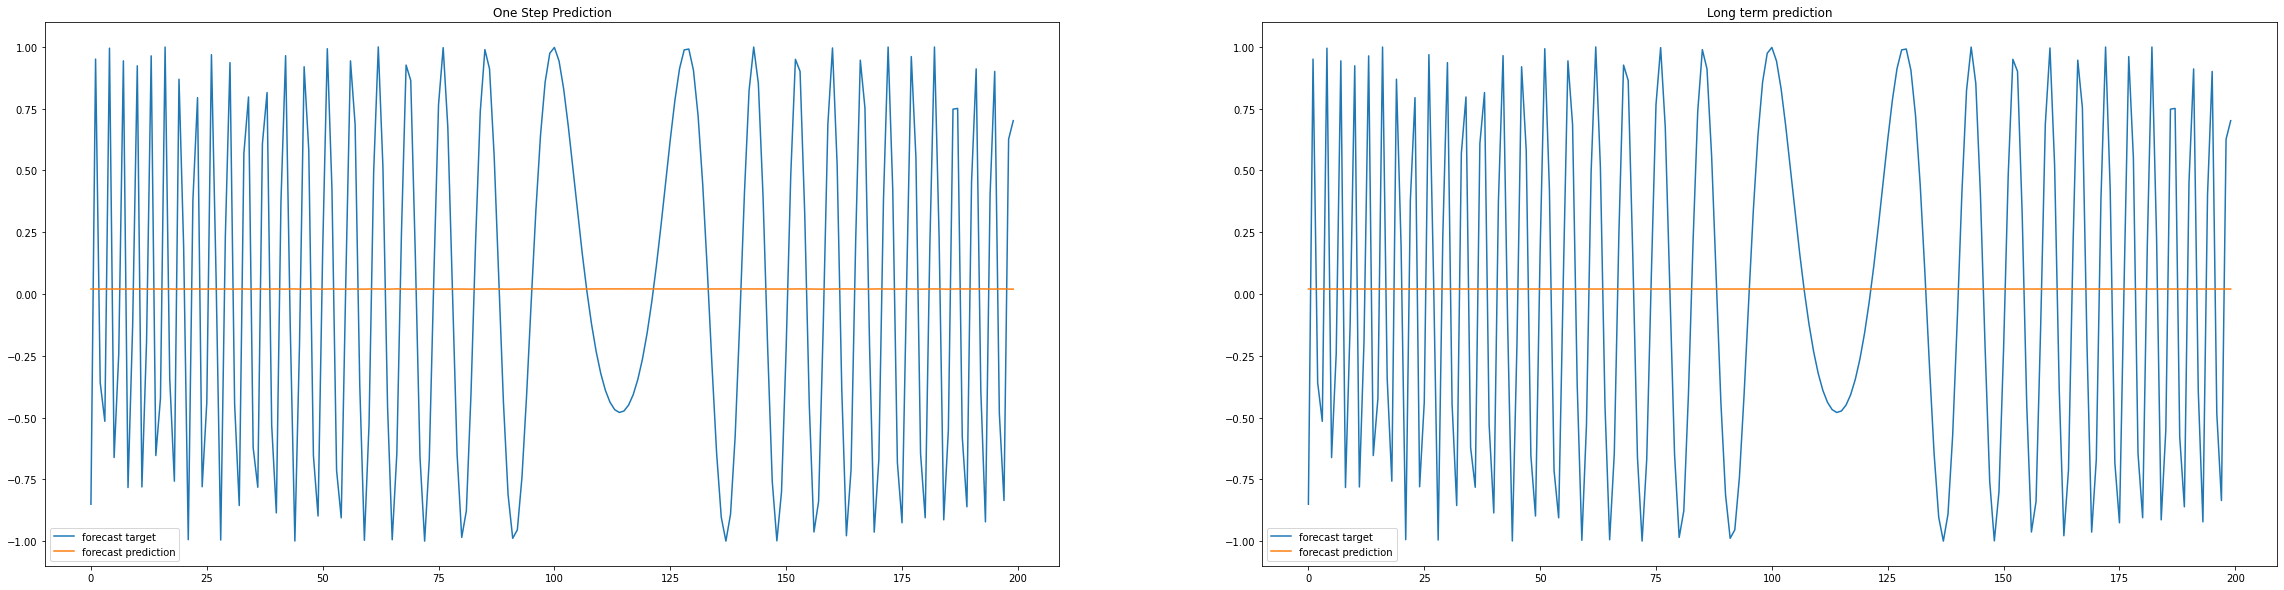

In [16]:
i = Input((T,D))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
history = model.fit(X[:idx], Y[:idx], epochs=80, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();
plt.show()

plot_predictions(model, X[idx:], Y[idx:])

# Simple RNN model

Epoch 1/200
6/6 [==============================] - 1s 59ms/step - loss: 0.6688 - val_loss: 0.6305
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4976 - val_loss: 0.6696
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 0.4357 - val_loss: 0.5384
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3779 - val_loss: 0.4113
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.3315 - val_loss: 0.3503
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 0.2420 - val_loss: 0.3446
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1841 - val_loss: 0.2202
Epoch 8/200
6/6 [==============================] - 0s 11ms/step - loss: 0.1252 - val_loss: 0.1541
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0861 - val_loss: 0.1367
Epoch 10/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0490 - val_loss: 0.1295
Epoch 11/200
6/6 [==

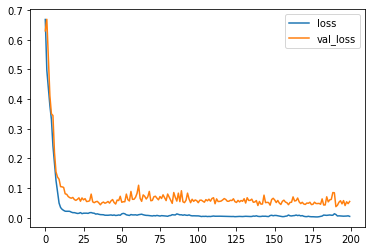

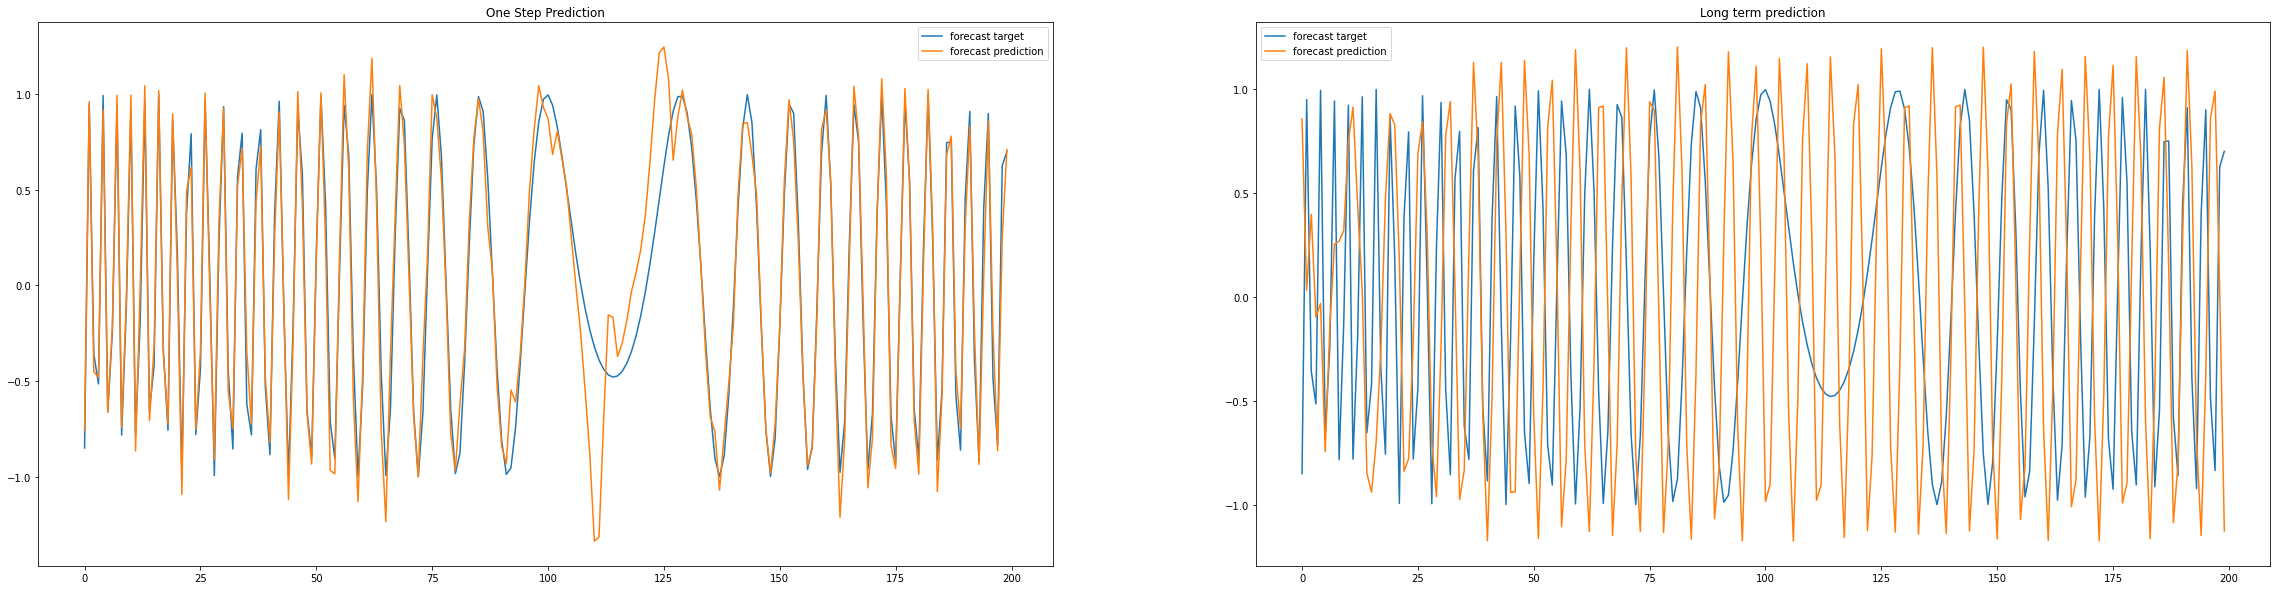

In [17]:
i = Input((T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plot_predictions(model, X[idx:], Y[idx:])

# GRU model

Epoch 1/200
6/6 [==============================] - 3s 98ms/step - loss: 0.5325 - val_loss: 0.5908
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.5241 - val_loss: 0.6497
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5098 - val_loss: 0.6346
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4952 - val_loss: 0.5839
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4933 - val_loss: 0.5665
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4828 - val_loss: 0.5648
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4806 - val_loss: 0.5578
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 0.4667 - val_loss: 0.5539
Epoch 9/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4037 - val_loss: 0.5381
Epoch 10/200
6/6 [==============================] - 0s 12ms/step - loss: 0.3192 - val_loss: 0.4682
Epoch 11/200
6/6 [=

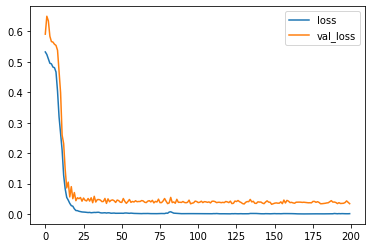

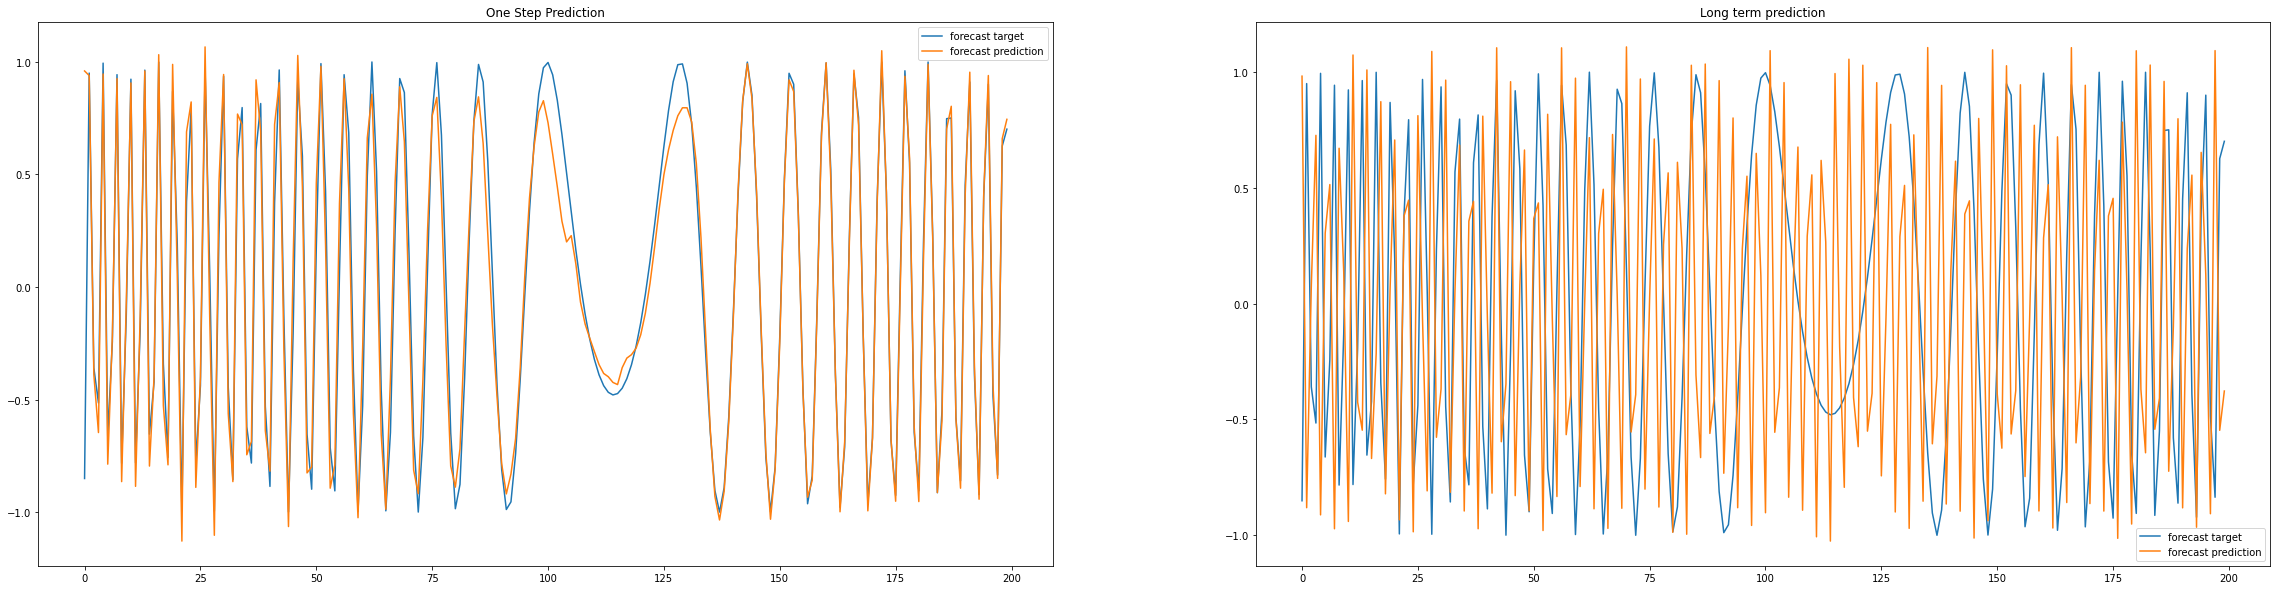

In [12]:
i = Input((T,D))
x = GRU(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plot_predictions(model, X[idx:], Y[idx:])

# LSTM model

Epoch 1/200
6/6 [==============================] - 2s 109ms/step - loss: 0.5330 - val_loss: 0.5259
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4984 - val_loss: 0.5458
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4754 - val_loss: 0.5667
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4440 - val_loss: 0.5606
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 0.3800 - val_loss: 0.5530
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.3030 - val_loss: 0.4580
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 0.2496 - val_loss: 0.3472
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1962 - val_loss: 0.3184
Epoch 9/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1559 - val_loss: 0.2128
Epoch 10/200
6/6 [==============================] - 0s 14ms/step - loss: 0.1156 - val_loss: 0.1608
Epoch 11/200
6/6 [

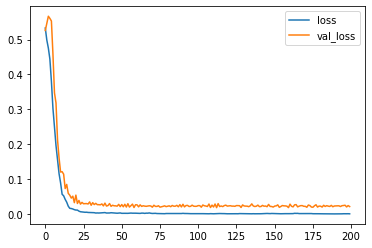

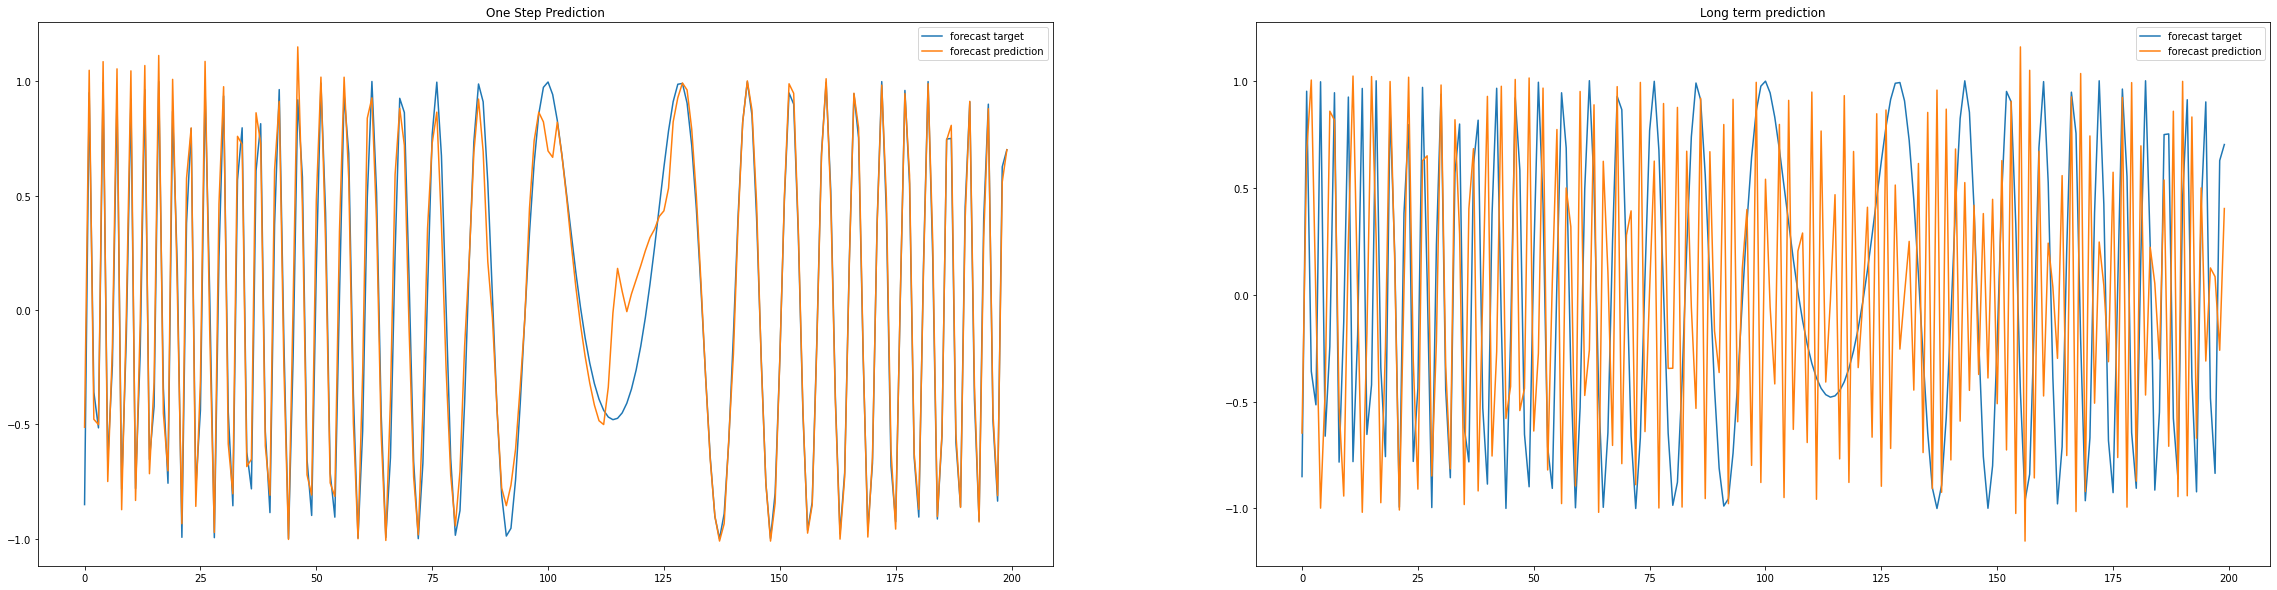

In [18]:
i = Input((T,D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.03))
history = model.fit(X[:idx], Y[:idx], epochs=200, batch_size=32, validation_data=(X[idx:], Y[idx:]));

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plot_predictions(model, X[idx:], Y[idx:])